In [20]:
import pandas as pd
import numpy as np
from itertools import product
import random

In [261]:
# sample students marks dataset
students = ['Alice', 'Sophie', 'John']
topics = ['ml', 'tp', 'py']
semesters = [s+1 for s in range(2)]
marks = np.random.randint(4,10,size=(12))
lectures = [(se, t,st) for se in semesters for st in students for t in random.sample(topics, 2)]

mi = pd.MultiIndex.from_tuples(lectures, names=['semester', 'topic', 'student'])
mi

MultiIndex([(1, 'ml',  'Alice'),
            (1, 'tp',  'Alice'),
            (1, 'py', 'Sophie'),
            (1, 'ml', 'Sophie'),
            (1, 'py',   'John'),
            (1, 'tp',   'John'),
            (2, 'ml',  'Alice'),
            (2, 'py',  'Alice'),
            (2, 'tp', 'Sophie'),
            (2, 'ml', 'Sophie'),
            (2, 'ml',   'John'),
            (2, 'tp',   'John')],
           names=['semester', 'topic', 'student'])

In [262]:
records = pd.DataFrame(marks, index=mi, columns=['mark'])

records.head()

mark
semester topic student      
1        ml    Alice       7
         tp    Alice       8
         py    Sophie      4
         ml    Sophie      4
         py    John        4

In [209]:
records.query('topic == "tp"')

mark
semester topic student      
1        tp    Sophie      7
               John        8
2        tp    Alice       5

In [210]:
#records[records['topic'] == 'ml']
records.query('topic == "ml"')

mark
semester topic student      
1        ml    Alice       7
               Sophie      3
2        ml    Sophie      8
               John        5

In [211]:
records

mark
semester topic student      
1        py    Alice       8
         ml    Alice       7
               Sophie      3
         tp    Sophie      7
         py    John        8
         tp    John        8
2        py    Alice       8
         tp    Alice       5
         py    Sophie      7
         ml    Sophie      8
         py    John        3
         ml    John        5

In [214]:
records.groupby(['semester','topic']).mean()

mark
semester topic      
1        ml      5.0
         py      8.0
         tp      7.5
2        ml      6.5
         py      6.0
         tp      5.0

In [215]:
records['mark_normalized'] = records/records.groupby(['semester','topic']).sum()
records

mark  mark_normalized
semester topic student                       
1        py    Alice       8         0.500000
         ml    Alice       7         0.700000
               Sophie      3         0.300000
         tp    Sophie      7         0.466667
         py    John        8         0.500000
         tp    John        8         0.533333
2        py    Alice       8         0.444444
         tp    Alice       5         1.000000
         py    Sophie      7         0.388889
         ml    Sophie      8         0.615385
         py    John        3         0.166667
         ml    John        5         0.384615

In [223]:
records[['mark_normalized']]

AttributeError: 'DataFrame' object has no attribute 'bars'

In [235]:
records[['mark']]

mark
semester topic student      
1        ml    Alice       7
               Sophie      3
         py    Alice       8
               John        8
         tp    John        8
               Sophie      7
2        ml    John        5
               Sophie      8
         py    Alice       8
               John        3
               Sophie      7
         tp    Alice       5

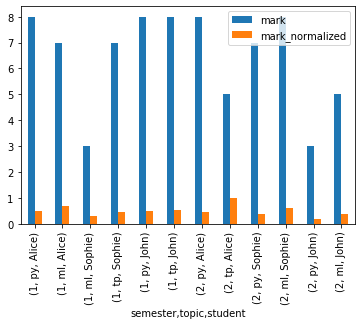

In [240]:
records.plot(kind='bar')

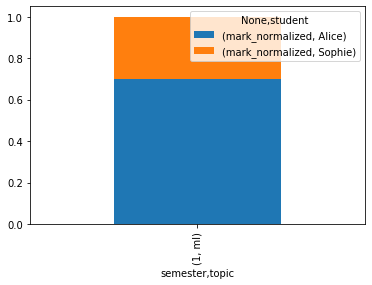

In [251]:
records[['mark_normalized']].query('semester == 1 & topic == "ml"').unstack().plot(kind='bar', stacked=True)

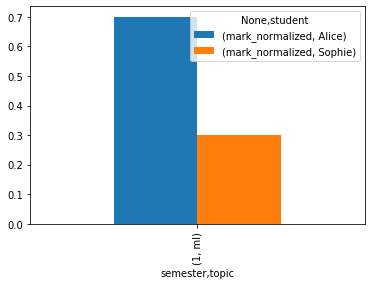

In [252]:
records[['mark_normalized']].query('semester == 1 & topic == "ml"').unstack().plot(kind='bar')

In [289]:
students = ['Alice', 'Sophie', 'John']
topics = ['ml', 'tp', 'py']
semesters = [s+1 for s in range(2)]
ammount = np.random.randint(4,10,size=(60))
days =['m', 'tu', 'w', 'th', 'f']
lectures = [(se, t, st, days[d]) for se in semesters for st in students for t in random.sample(topics, 2) for d in range(0, 5)]

mi = pd.MultiIndex.from_tuples(lectures, names=['semester', 'topic', 'student', 'day'])

records = pd.DataFrame(ammount, index=mi, columns=['ammount'])

records.head()

ammount
semester topic student day         
1        py    Alice   m          8
                       tu         5
                       w          5
                       th         9
                       f          4

In [316]:
records

ammount
semester topic student day         
1        py    Alice   m          8
                       tu         5
                       w          5
                       th         9
                       f          4
         tp    Alice   m          7
                       tu         6
                       w          6
                       th         6
                       f          8
         ml    Sophie  m          6
                       tu         9
                       w          4
                       th         4
                       f          9
         py    Sophie  m          4
                       tu         7
                       w          7
                       th         4
                       f          9
               John    m          8
                       tu         5
                       w          8
                       th         5
                       f          4
         ml    John    m          4
                       tu         6
                       w          6
                       th         6
                       f          9
2        ml    Alice   m          7
                       tu         6
                       w          6
                       th         9
                       f          5
         py    Alice   m          5
                       tu         5
                       w          6
                       th         6
                       f          7
               Sophie  m          8
                       tu         8
                       w          4
                       th         6
                       f          4
         ml    Sophie  m          8
                       tu         7
                       w          6
                       th         4
                       f          7
               John    m          7
                       tu         4
                       w          8
                       th         8
                       f          4
         tp    John    m          7
                       tu         9
                       w          4
                       th         8
                       f          5

In [309]:
grouped_se_t_st = records.groupby(['semester', 'topic', 'student'])
grouped_se_t_st[['ammount']].sum()

ammount
semester topic student         
1        ml    John          31
               Sophie        32
         py    Alice         31
               John          30
               Sophie        31
         tp    Alice         33
2        ml    Alice         33
               John          31
               Sophie        32
         py    Alice         29
               Sophie        30
         tp    John          33

In [311]:
grouped_se_t_d = records.groupby(['semester', 'topic', 'day'])
grouped_se_t_d.sum()

ammount
semester topic day         
1        ml    f         18
               m         10
               th        10
               tu        15
               w         10
         py    f         17
               m         20
               th        18
               tu        17
               w         20
         tp    f          8
               m          7
               th         6
               tu         6
               w          6
2        ml    f         16
               m         22
               th        21
               tu        17
               w         20
         py    f         11
               m         13
               th        12
               tu        13
               w         10
         tp    f          5
               m          7
               th         8
               tu         9
               w          4

In [313]:
records/grouped_se_t_d.sum()

ammount
semester topic day student          
1        ml    f   Sophie   0.500000
                   John     0.500000
               m   Sophie   0.600000
                   John     0.400000
               th  Sophie   0.400000
                   John     0.600000
               tu  Sophie   0.600000
                   John     0.400000
               w   Sophie   0.400000
                   John     0.600000
         py    f   Alice    0.235294
                   Sophie   0.529412
                   John     0.235294
               m   Alice    0.400000
                   Sophie   0.200000
                   John     0.400000
               th  Alice    0.500000
                   Sophie   0.222222
                   John     0.277778
               tu  Alice    0.294118
                   Sophie   0.411765
                   John     0.294118
               w   Alice    0.250000
                   Sophie   0.350000
                   John     0.400000
         tp    f   Alice    1.000000
               m   Alice    1.000000
               th  Alice    1.000000
               tu  Alice    1.000000
               w   Alice    1.000000
2        ml    f   Alice    0.312500
                   Sophie   0.437500
                   John     0.250000
               m   Alice    0.318182
                   Sophie   0.363636
                   John     0.318182
               th  Alice    0.428571
                   Sophie   0.190476
                   John     0.380952
               tu  Alice    0.352941
                   Sophie   0.411765
                   John     0.235294
               w   Alice    0.300000
                   Sophie   0.300000
                   John     0.400000
         py    f   Alice    0.636364
                   Sophie   0.363636
               m   Alice    0.384615
                   Sophie   0.615385
               th  Alice    0.500000
                   Sophie   0.500000
               tu  Alice    0.384615
                   Sophie   0.615385
               w   Alice    0.600000
                   Sophie   0.400000
         tp    f   John     1.000000
               m   John     1.000000
               th  John     1.000000
               tu  John     1.000000
               w   John     1.000000

In [315]:
records/grouped_se_t_st.sum()

ammount
semester topic student day          
1        ml    John    m    0.129032
                       tu   0.193548
                       w    0.193548
                       th   0.193548
                       f    0.290323
               Sophie  m    0.187500
                       tu   0.281250
                       w    0.125000
                       th   0.125000
                       f    0.281250
         py    Alice   m    0.258065
                       tu   0.161290
                       w    0.161290
                       th   0.290323
                       f    0.129032
               John    m    0.266667
                       tu   0.166667
                       w    0.266667
                       th   0.166667
                       f    0.133333
               Sophie  m    0.129032
                       tu   0.225806
                       w    0.225806
                       th   0.129032
                       f    0.290323
         tp    Alice   m    0.212121
                       tu   0.181818
                       w    0.181818
                       th   0.181818
                       f    0.242424
2        ml    Alice   m    0.212121
                       tu   0.181818
                       w    0.181818
                       th   0.272727
                       f    0.151515
               John    m    0.225806
                       tu   0.129032
                       w    0.258065
                       th   0.258065
                       f    0.129032
               Sophie  m    0.250000
                       tu   0.218750
                       w    0.187500
                       th   0.125000
                       f    0.218750
         py    Alice   m    0.172414
                       tu   0.172414
                       w    0.206897
                       th   0.206897
                       f    0.241379
               Sophie  m    0.266667
                       tu   0.266667
                       w    0.133333
                       th   0.200000
                       f    0.133333
         tp    John    m    0.212121
                       tu   0.272727
                       w    0.121212
                       th   0.242424
                       f    0.151515

In [333]:
grouped_se_d = records.groupby(['semester', 'day'])
grouped_se_t = records.groupby(['semester', 'topic'])
grouped_se_d.sum()

ammount
semester day         
1        f         43
         m         37
         th        34
         tu        38
         w         36
2        f         32
         m         42
         th        41
         tu        39
         w         34

In [358]:
sem_to_stu = records.groupby(['semester', 'topic', 'student'])[['ammount']].sum()
#sem_to_stu/grouped_se_t.sum()
sem_to_stu

ammount
semester topic student         
1        ml    John          31
               Sophie        32
         py    Alice         31
               John          30
               Sophie        31
         tp    Alice         33
2        ml    Alice         33
               John          31
               Sophie        32
         py    Alice         29
               Sophie        30
         tp    John          33

In [375]:
total_per_topic = sem_to_stu.unstack().sum(axis=1)
total_per_topic

semester  topic
1         ml       63.0
          py       92.0
          tp       33.0
2         ml       96.0
          py       59.0
          tp       33.0
dtype: float64

In [404]:
sem_to_stu.unstack()['ammount']

student         Alice  John  Sophie
semester topic                     
1        ml       NaN  31.0    32.0
         py      31.0  30.0    31.0
         tp      33.0   NaN     NaN
2        ml      33.0  31.0    32.0
         py      29.0   NaN    30.0
         tp       NaN  33.0     NaN

In [429]:
# applying a different arithmetic opperation per column
sem_to_stu.unstack()['ammount'].apply(lambda row: [row['Alice']/2, row['Sophie'] * 2], axis=1)

semester  topic
1         ml        [nan, 64.0]
          py       [15.5, 62.0]
          tp        [16.5, nan]
2         ml       [16.5, 64.0]
          py       [14.5, 60.0]
          tp         [nan, nan]
dtype: object

In [435]:
# Using apply to divide per column using another df does not produce the expected result
# in this case the result seems to be an element wise operation
sem_to_stu.unstack()['ammount'].apply(lambda row: [row['Alice']/total_per_topic, row['Sophie'] * 2], axis=1)

semester  topic
1         ml                  [[nan, nan, nan, nan, nan, nan], 64.0]
          py       [[0.49206349206349204, 0.33695652173913043, 0....
          tp       [[0.5238095238095238, 0.358695652173913, 1.0, ...
2         ml       [[0.5238095238095238, 0.358695652173913, 1.0, ...
          py       [[0.4603174603174603, 0.31521739130434784, 0.8...
          tp                   [[nan, nan, nan, nan, nan, nan], nan]
dtype: object

In [460]:
# Indeed, the same values can be obtained by element wise operations
np.multiply(sem_to_stu.unstack()['ammount']['Alice'].values, 1/total_per_topic.values)

array([       nan, 0.33695652, 1.        , 0.34375   , 0.49152542,
              nan])

In [417]:
# Whereas, I am trying to to achieve a result similar to the next
sem_to_stu.unstack()['ammount']['Alice'] / total_per_topic, sem_to_stu.unstack()['ammount']['John'] / total_per_topic,

(semester  topic
 1         ml            NaN
           py       0.336957
           tp       1.000000
 2         ml       0.343750
           py       0.491525
           tp            NaN
 dtype: float64,
 semester  topic
 1         ml       0.492063
           py       0.326087
           tp            NaN
 2         ml       0.322917
           py            NaN
           tp       1.000000
 dtype: float64)

In [427]:
# instead using unstack, apply, and stack again produced the expected result
# unstack expands/pivots the student index to columns
# stack pivots the student columns back to the multi-level index
sem_to_stu.unstack()['ammount'].apply(lambda row: row/total_per_topic).stack()

semester  topic  student
1         ml     John       0.492063
                 Sophie     0.507937
          py     Alice      0.336957
                 John       0.326087
                 Sophie     0.336957
          tp     Alice      1.000000
2         ml     Alice      0.343750
                 John       0.322917
                 Sophie     0.333333
          py     Alice      0.491525
                 Sophie     0.508475
          tp     John       1.000000
dtype: float64